### Shape of the utility function evaluated on capital grid [5, 20] on 1000 points

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from src.dp import UtilityFactory, DP

alpha = 0.4
sigma = 1
delta = 0.04

utility = UtilityFactory.utility3(alpha=alpha, delta=delta)
capital = np.linspace(5, 20, num=1000)

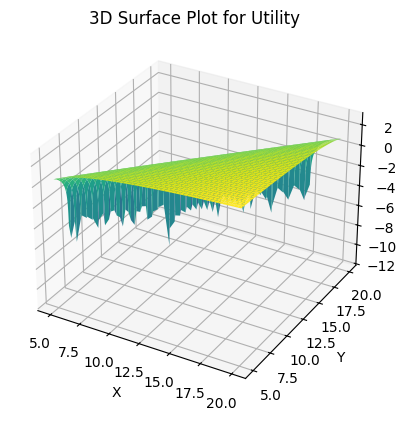

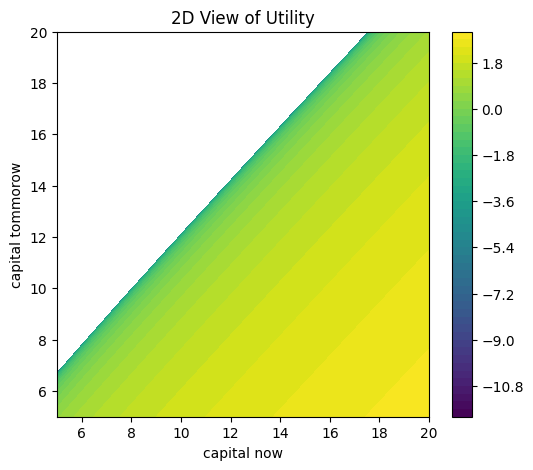

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plotting

X, Y = np.meshgrid(capital, capital)
# Define the function z = f(x, y)
Z = utility(X, Y)

# Set up the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plot the surface
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_title('3D Surface Plot for Utility')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Utility')
plt.show()


# Create the grid
X, Y = np.meshgrid(capital, capital)
Z = utility(X, Y)

# Plot the 2D filled contour
plt.figure(figsize=(6, 5))
contour = plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(contour)
plt.title("2D View of Utility")
plt.xlabel("capital now")
plt.ylabel("capital tommorow")
plt.show()

In [24]:
state_path = np.load('repo/path.npy')
state_values = np.load('repo/state_values.npy')

# Value of capital

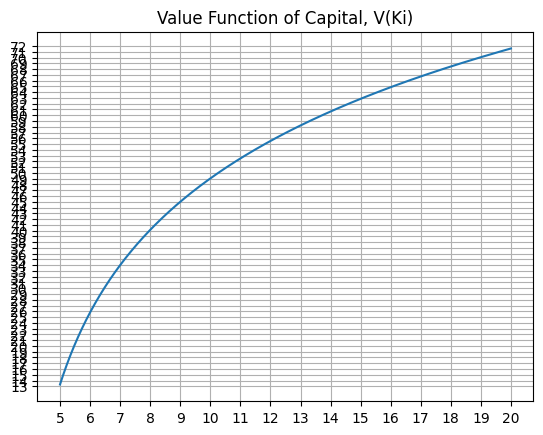

In [25]:
import pandas as pd
ds = {"Capital": [], "Value": []}
for i,v in enumerate(state_values):
    c = capital[i]
    ds['Capital'].append(c)
    ds['Value'].append(v)

df = pd.DataFrame(ds)
T = len(df)
plt.title("Value Function of Capital, V(Ki)")
_=plt.plot(df["Capital"], df["Value"])
_=plt.xticks(np.arange(round(np.min(df["Capital"])), np.max(df["Capital"]+1), step=1))  
_=plt.yticks(np.arange(round(np.min(df["Value"])), np.max(df["Value"]+1), step=1))  
plt.grid()
plt.show()

# Consumption and capital across time: Ct, Kt

In [26]:
def get_capital_choices(capital_levels: np.array):
    """
        Returns capital trajectories for the initial capital 
    """
    state_path = np.load('repo/path.npy')
    state_path = state_path.astype(int)
    f = np.vectorize(lambda x: capital_levels[x])
    capital_paths = f(state_path)
    return capital_paths

def production(capital, alpha):
    return capital**alpha

def consumption(k_now, k_next, alpha, delta):
    return production(k_now, alpha) + (1-delta)*k_now - k_next

def get_consumption_levels(capital_paths, alpha, delta):
    capital_levels = np.linspace(5, 20, num=1000)
    capital_paths = get_capital_choices(capital_levels)
    path_nums, _ = capital_paths.shape
    ct = np.zeros_like(capital_paths)
    for i in range(path_nums):
        capital_t = capital_paths[i]
        capital_next = np.append(capital_t[1:], [0])
        ct[i, :] = capital_t**alpha + (1-delta)*capital_t - capital_next
    return ct

def get_future_capital(capital_paths, production_function, delta):
    path_nums, _ = capital_paths.shape
    ct = np.zeros_like(capital_paths)
    for i in range(path_nums):
        capital_t = capital_paths[i, :]
        capital_next = np.append(capital_paths[i, 1:], [0])
        ct[i, :] = production_function(capital_t) + (1-delta)*capital_t - capital_next
    return ct

In [34]:
capital_paths[100]

array([6.5015015, 5.       , 5.       , 5.       , 5.       , 5.       ,
       5.       , 5.       , 5.       , 5.       , 5.       , 5.       ,
       5.       , 5.       , 5.       , 5.       , 5.       , 5.       ,
       5.       , 5.       , 5.       , 5.       , 5.       , 5.       ,
       5.       , 5.       , 5.       , 5.       , 5.       , 5.       ,
       5.       , 5.       , 5.       , 5.       , 5.       , 5.       ,
       5.       , 5.       , 5.       , 5.       , 5.       , 5.       ,
       5.       , 5.       , 5.       , 5.       , 5.       , 5.       ,
       5.       , 5.       , 5.       , 5.       , 5.       , 5.       ,
       5.       , 5.       , 5.       , 5.       , 5.       , 5.       ,
       5.       , 5.       , 5.       , 5.       , 5.       , 5.       ,
       5.       , 5.       , 5.       , 5.       , 5.       , 5.       ,
       5.       , 5.       , 5.       , 5.       , 5.       , 5.       ,
       5.       , 5.       , 5.       , 5.       , 

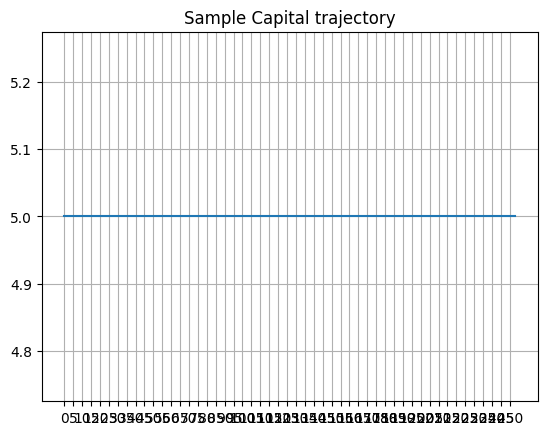

In [27]:
alpha = 0.4
delta = 0.04

capital_levels = np.linspace(5, 20, num=1000)
capital_paths = get_capital_choices(capital_levels)

plt.title("Sample Capital trajectory")
cp = capital_paths[0]
plt.plot(cp)
plt.xticks(np.arange(0, len(capital_paths[0]), step=5))
plt.grid()

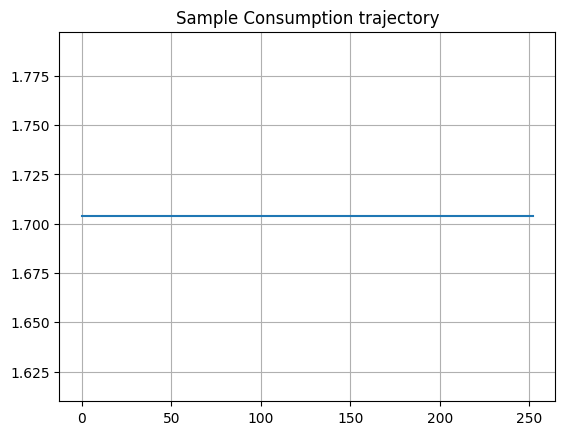

In [28]:
alpha = 0.4
delta = 0.04

capital_levels = np.linspace(5, 20, num=1000)
capital_paths = get_capital_choices(capital_levels)
N, T = capital_paths.shape

ct = get_consumption_levels(capital_paths, alpha, delta)
plt.title("Sample Consumption trajectory")
ct0 = ct[0][:-1]
plt.plot(ct0)
plt.grid()

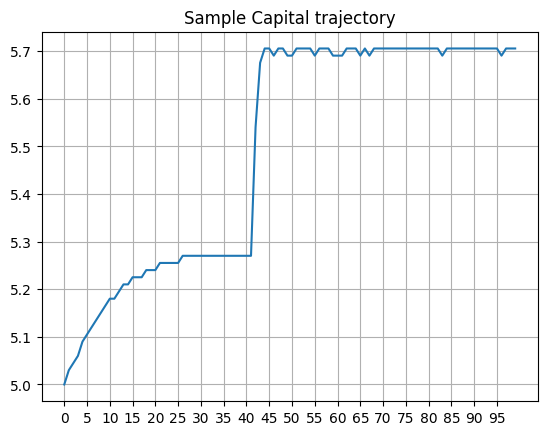

## Capital Consumption, Kt(Ct)

(1000, 100) (1000, 100) 100


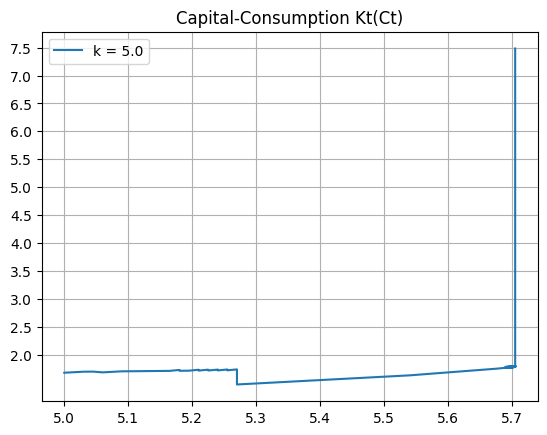

In [ ]:
print(capital_paths.shape, ct.shape, len(capital_paths[0,:]))
N, T = capital_paths.shape
plt.title("Capital-Consumption Kt(Ct)")

index = 0
consumption, capital_path = ct[index, :], capital_paths[index,:]

k0 = round(capital_path[0], 3)
_=plt.plot(capital_path, consumption, label=f"k = {k0}")

plt.yticks(np.arange(2, 8, step=0.5))  

plt.grid()
plt.legend()

## Capital vs. Next capital: k'(k)

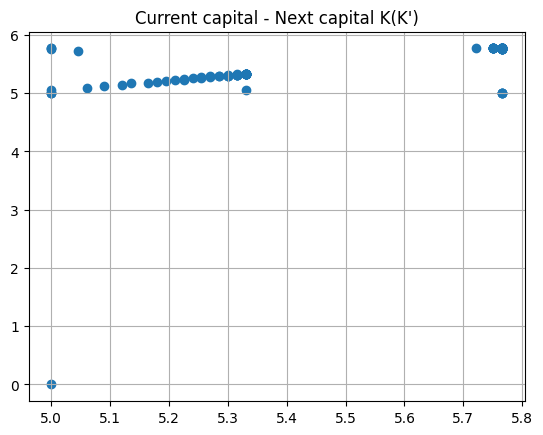

In [ ]:
i = 4
capital_t = capital_paths[i, :]
capital_next = np.append(capital_paths[i, 1:], [0])
plt.title("Current capital - Next capital K(K')")
plt.scatter(capital_t, capital_next)
plt.grid()

## Steady state

Steady state of the system is the state where the observed varaible become constant. In our case we are observing capital and consumption steady states. 
In the dynamic programming, the steady states of the consumption are derived from the optimal temporal capital allocations. 

In the steady state is is valid:

$c_T = c_{T+1} = c_{T+2} = css$

$k_t = k_{t+1} = k_{t+2} = kss$

<br>
From the motion of capital equation we can find our equations for capital steady state:

$c_t = k_t^\alpha - (1-\delta)k_t - k_{t+1}$

$css = k_{ss}^\alpha - (1-\delta)k_{ss} - k_{ss}$

$kss = \frac{c_{ss}}{1-\sigma}$



### Calculations

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from src.dp import UtilityFactory

state_path = np.load('repo/path.npy')
state_values = np.load('repo/state_values.npy')
capital_levels = np.linspace(5, 20, num=1000)
capital_paths = get_capital_choices(capital_levels)
utility = lambda c : np.log(c)

alpha = 0.4
delta = 0.04
beta = 0.96


production_function = lambda xs : production(xs, alpha)
ct = get_consumption_levels(capital_paths, production_function, delta)
css = ct[:, -1]
kss = css / (1-delta)

levels = 1000, T = 218


In [ ]:
N, T = ct.shape
ni = css / production_function(kss)
ni = np.tile(ni, (T, 1)).T   # 4 rows, 3 columns
produced = production_function(capital_paths)
ct_ = produced*ni
discounts = np.array([beta**t for t in range(T)])
v0k = (discounts*ct_).sum(axis=1)


In [ ]:
alpha = 0.4
delta = 0.04
beta = 0.96
epsilon = 0.0001
capital = np.linspace(5, 20, num=1000)
u = UtilityFactory.utility3(alpha, delta)

dp = DP()
dp.set_init(v0k)
#state_values, state_path = dp.value_iteration(states=capital, utility_function=u, alpha=alpha, beta=beta, capital_deprec=delta, epsilon=epsilon)

Suppose that the initial capital stock k0 is 25 percent below the steady state
level. Use the optimal policy function k′N(k) to compute the optimal transition
to the steady state. Plot the transition path

initial_capital = 5.795495109858811
53


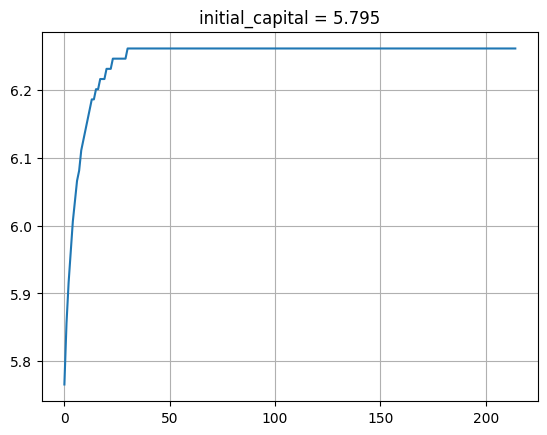

In [ ]:
def policy(k, capital_levels, capital_paths):
    idx = np.argmin(abs(k - capital_levels))
    print(idx)
    return capital_paths[idx, :][::-1][3:]

k0 = kss*0.75
k0_cp = k0[10]
print(f"initial_capital = {k0_cp}")
optimal_trajectory = policy(k0_cp, capital_levels, capital_paths)

plt.title(f"initial_capital = {round(k0_cp, 3)}")
plt.plot(optimal_trajectory)
plt.grid()